In [2]:
# Marizta Castellanos Melo UNAD_ Regresión Logística
# 1. Realizar un análisis exploratorio de los datos para identificar 
# relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Instalamos las bibliotecas necesarias
!pip install pandas numpy scikit-learn matplotlib

In [6]:
#Importamos las librerías necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones
#Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
import pandas as pd

# Cargamos el dataset "heart_cleveland_upload" para la regresión logística
data = pd.read_csv('C:\\ANALISIS DE DATOS\\Anexo 3 - Dataset Heart Disease Cleveland UCI\\heart_cleveland_upload.csv')

# Mostrar las primeras filas del dataset para entender su estructura
print(data.head(10))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1   

In [13]:
#Visualizamos la descripción de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


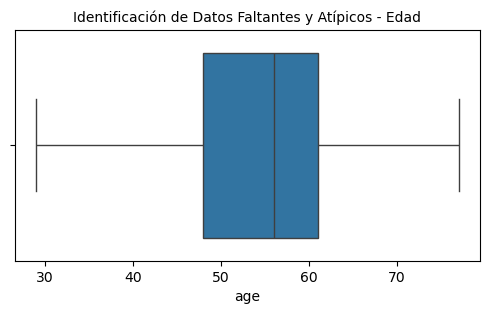

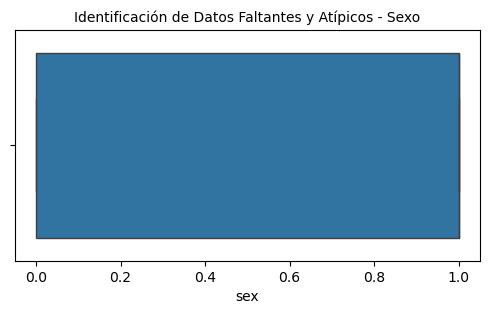

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset "heart_cleveland_upload" para la regresión logística
data = pd.read_csv('C:\\ANALISIS DE DATOS\\Anexo 3 - Dataset Heart Disease Cleveland UCI\\heart_cleveland_upload.csv')

# Identificamos los datos faltantes y atípicos para la columna 'age'
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age'])
plt.title('Identificación de Datos Faltantes y Atípicos - Edad', fontsize=10)
plt.show()

# Identificamos los datos faltantes y atípicos para la columna 'sex'
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['sex'])
plt.title('Identificación de Datos Faltantes y Atípicos - Sexo', fontsize=10)
plt.show()


In [17]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [24]:
#Revisamos si existen datos faltantes en las columnas que seleccionamos para estudiar, 
print("Cantidad de Registros Vacios en AGE: ",data['age'].isnull().sum())
print("Cantidad de Registros con cero en AGE: ",data['age'].isin([0]).sum())
print("Cantidad de Registros Vacios en CP: ",data['cp'].isnull().sum())
print("Cantidad de Registros con cero en CP: ",data['cp'].isin([0]).sum())

Cantidad de Registros Vacios en AGE:  0
Cantidad de Registros con cero en AGE:  0
Cantidad de Registros Vacios en CP:  0
Cantidad de Registros con cero en CP:  23


In [26]:
#Debido a que no hay valores nulos en las columnas, pero si ceros, reemplazamos todos los ceros con el valor medio (promedio) de la columna.
data['cp']=data['cp'].replace(0,data['cp'].mean())

In [28]:
#Revisamos de nuevo las columnas detectadas
print("Cantidad de Registros con cero en CP: ",data['cp'].isin([0]).sum())

Cantidad de Registros con cero en CP:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

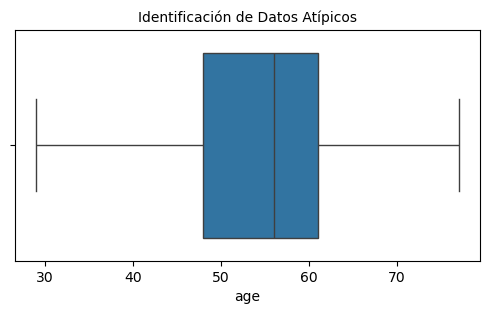

In [30]:
#Identificamos datos atípicos en las columnas
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [32]:
#Realizamos un conteo de Datos Atípicos
#Columna age
min_lvl=29
max_lvl=77
total_atp=((data['age']<min_lvl)|(data['age']>max_lvl)).sum()
print("El total de datos atípicos es {}".format(total_atp))
#Columna cp
min_lvl=0
max_lvl=3
total_atp=((data['cp']<min_lvl)|(data['cp']>max_lvl)).sum()
print("El total de datos atípicos es {}".format(total_atp))

El total de datos atípicos es 0
El total de datos atípicos es 0


In [34]:
#Revisamos la información del dataset, comprobando en total si existen datos atipicos o faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 32.6 KB


In [36]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

#Características a tomar en cuenta:
#La persona tiene una enfermedad cardiaca (0 = no, 1 = si)
#Predecir si la persona puede tener una enfermedad cardiaca
data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [20]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convertimos a DataFrame
df = pd.DataFrame(data)

# Preprocesamos los datos, asignando a las variables X y Y la información del entrenamiento
X = df.drop('condition', axis=1)  # Variable base en la que predecir
y = df['condition']  # Variable objetivo para predecir

# Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostramos el train X
print(X_train)


     age  sex        cp  trestbps  chol  fbs  restecg  thalach  exang  \
91    62    0  2.000000       130   263    0        0       97      0   
115   53    1  2.000000       130   246    1        2      173      0   
125   50    0  2.000000       120   219    0        0      158      0   
63    41    1  1.000000       135   203    0        0      132      0   
159   68    1  3.000000       144   193    1        0      141      0   
..   ...  ...       ...       ...   ...  ...      ...      ...    ...   
12    59    1  2.158249       134   204    0        0      162      0   
235   56    1  3.000000       130   283    1        2      103      1   
288   42    1  3.000000       136   315    0        0      125      1   
216   58    1  3.000000       128   259    0        2      130      1   
263   50    1  3.000000       150   243    0        2      128      0   

     oldpeak  slope  ca  thal  
91       1.2      1   1     2  
115      0.0      0   3     0  
125      1.6      1   0    

In [42]:
#Mostramos el train y
print (y_train)

91     1
115    0
125    0
63     0
159    1
      ..
12     1
235    1
288    1
216    1
263    1
Name: condition, Length: 237, dtype: int64


In [94]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Importa LogisticRegression

# Supongo que ya tienes el dataset cargado como 'data'
# Convertimos a DataFrame
df = pd.DataFrame(data)

# Preprocesamos los datos, asignando a las variables X y Y la información del entrenamiento
X = df.drop('condition', axis=1)  # Variable base en la que predecir
y = df['condition']  # Variable objetivo para predecir

# Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creamos el modelo de regresión logística 
model_r = LogisticRegression(solver="liblinear")  # liblinear es una librería para resolver problemas lineales de clasificación y regresión
model_r.fit(X_train, y_train)   

# Creamos el modelo de predicción
pred = model_r.predict(X_test)  # La función predict predice los valores a partir del conjunto de datos de validación

# Mostramos las predicciones
print(pred)


[0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]


In [48]:
#Mostramos la prueba y
print (y_test)

295    0
215    0
66     0
77     0
53     0
249    0
28     1
188    0
126    1
141    0
224    1
121    0
29     0
167    1
103    1
292    1
10     1
20     0
100    1
294    1
95     0
191    0
267    1
150    0
273    1
272    0
137    0
247    1
1      0
192    1
83     0
270    1
242    1
284    0
73     0
208    1
116    0
217    1
135    0
244    1
68     0
228    1
3      1
202    1
101    0
64     0
274    1
117    0
281    1
131    0
156    0
200    1
140    0
30     0
236    1
264    1
205    1
70     0
287    0
260    1
Name: condition, dtype: int64


In [50]:
#Mostramos la predicción
print (pred)

[0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]


In [106]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [128]:
#Comprobamos el desempeño del modelo de regresión
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



In [110]:
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

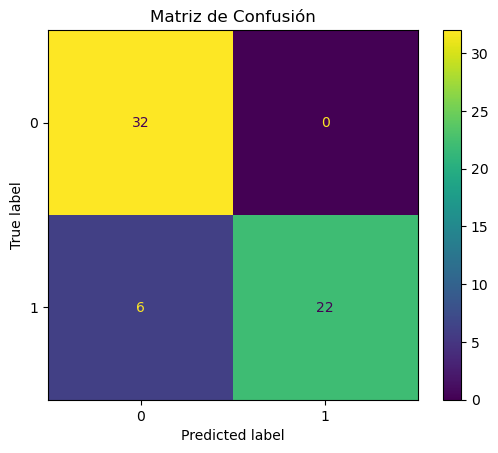

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongo que ya tienes el dataset cargado como 'data'
# Convertimos a DataFrame
df = pd.DataFrame(data)

# Preparamos los datos
X = df.drop('condition', axis=1)
y = df['condition']

# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Creamos y entrenamos el modelo
model_r = LogisticRegression(solver="liblinear")
model_r.fit(X_train, y_train)

# Hacemos predicciones
pred = model_r.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")  # Título opcional
plt.show()  # Muestra el gráfico


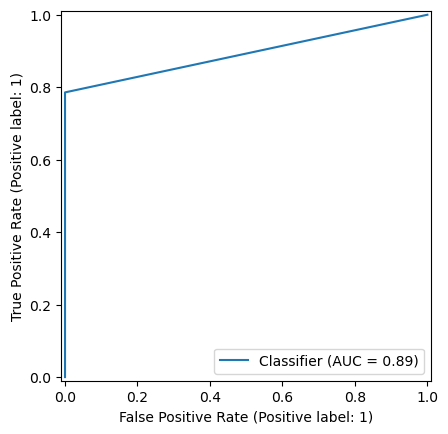

In [58]:
#Comprobamos la curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

In [116]:
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [134]:
#Análisis de resultados
#Al evaluar los resultados, considera lo siguiente:

# Interpretación del Gráfico ROC

# 1. Ejes del Gráfico:
# - En el eje X, se encuentra la Tasa de Falsos Positivos, 
#   que representa la proporción de negativos que han sido clasificados incorrectamente como positivos.
# - En el eje Y, está la Tasa de Verdaderos Positivos, 
#   que muestra la proporción de positivos que han sido identificados correctamente.

# 2. Curva ROC:
# - La línea que aparece en el gráfico representa la curva ROC (Receiver Operating Characteristic). 
#   Esta curva ilustra el rendimiento del clasificador a medida que se ajusta el umbral de decisión.
# - Una curva ideal se acercaría a la esquina superior izquierda del gráfico, 
#   indicando una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

# 3. AUC (Área Bajo la Curva):
# - El valor de AUC (Area Under the Curve) es 0.89, 
#   lo que indica que el clasificador tiene un buen rendimiento. 
#   Un AUC de 1.0 sería un clasificador perfecto, 
#   mientras que 0.5 indicaría que el clasificador no es mejor que el azar.
# - Con un AUC de 0.89, se puede concluir que el modelo tiene una buena capacidad 
#   para distinguir entre las clases positivas y negativas.

# Conclusión:
# En resumen, el clasificador que estoy analizando es efectivo, 
# ya que presenta una alta tasa de verdaderos positivos con una baja tasa de falsos positivos. 
# Esto sugiere que puedo confiar en mi modelo para predecir la clase positiva en la mayoría de los casos